In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
#Loading the Datasets for ecomony and business class flights

df1=pd.read_csv("/content/drive/MyDrive/dynamic flight price/business.csv")
df2=pd.read_csv("/content/drive/MyDrive/dynamic flight price/economy.csv")


In [ ]:
df1.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
70073,22-03-2022,Air India,AI,616,08:25,Hyderabad,12h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:15,Delhi,"39,499"
5687,17-02-2022,Air India,AI,665,08:00,Delhi,27h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:10,Bangalore,"42,457"
57066,27-03-2022,Air India,AI,775,20:45,Kolkata,12h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:55,Delhi,"57,939"
49442,14-02-2022,Air India,AI,808,21:00,Bangalore,14h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,11:55,Hyderabad,"56,476"
60543,29-03-2022,Vistara,UK,706,10:15,Kolkata,11h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:00,Mumbai,"70,431"


In [ ]:
df2.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
53020,12-02-2022,Vistara,UK,958,12:25,Mumbai,29h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:15,Bangalore,"22,254"
136311,17-02-2022,Air India,AI,402,10:25,Kolkata,22h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:55,Bangalore,"13,524"
49352,15-03-2022,Indigo,6E,5376,00:10,Mumbai,08h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:00,Delhi,"4,156"
23803,04-03-2022,Vistara,UK,963,08:50,Delhi,08h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,16:50,Kolkata,"6,578"
153328,19-02-2022,Air India,AI,9875,11:00,Hyderabad,21h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\...,08:55,Delhi,"11,488"


In [ ]:
#Adding a cloumn on each dataset for their respective classes

df1['class'] = 'business'
df2['class'] = 'economy'

In [ ]:
df2.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
93036,27-03-2022,Air India,AI,9517,18:50,Bangalore,14h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:55,Delhi,"3,685",economy
71455,20-02-2022,Indigo,6E,6809,16:55,Mumbai,05h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:35,Hyderabad,"11,141",economy
78982,24-02-2022,Air India,AI,809,10:00,Mumbai,13h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:35,Chennai,"9,201",economy
174731,18-03-2022,AirAsia,I5,766,20:55,Hyderabad,10h 15m,2+-stop,07:10,Kolkata,"2,056",economy
1934,22-02-2022,Air India,AI,636,14:30,Delhi,03h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t...,18:00,Mumbai,"5,955",economy


In [ ]:
#Joining both dataFrames df1 and df2

df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.sample(7)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
275251,22-02-2022,AirAsia,I5,517,09:10,Chennai,16h 00m,2+-stop,01:10,Delhi,"7,353",economy
22595,25-03-2022,Air India,AI,864,07:00,Mumbai,02h 10m,non-stop,09:10,Delhi,"22,140",business
255989,11-03-2022,Indigo,6E,6433,22:25,Hyderabad,09h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:10,Mumbai,"4,138",economy
228007,25-03-2022,Air India,AI,763,07:00,Kolkata,11h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,18:00,Mumbai,"5,523",economy
242557,23-02-2022,Indigo,6E,534,18:25,Kolkata,05h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:45,Chennai,"8,930",economy
34955,14-02-2022,Air India,AI,687,16:00,Mumbai,16h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,08:55,Chennai,"57,554",business
20085,01-03-2022,Vistara,UK,877,10:45,Mumbai,09h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Delhi,"47,844",business


In [ ]:
#Checking out the total number of records present in my dataset.

print("This data contains ",df.shape[0], "records of flight bookings in a online ticket booking platform")

This data contains  300261 records of flight bookings in a online ticket booking platform


In [ ]:
#Checking out the number of null values present in each column of my dataset.

df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

There are no null values present in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


1. Size: The DataFrame contains 300,261 entries (rows) and 12 columns.

2. Columns:

a. date: Date of the flight.
b. airline: Airline name.
c. ch_code: Channel code.
d. num_code: Numeric code.
e. dep_time: Departure time.
f. from: Departure location.
g. time_taken: Duration of the flight.
h. stop: Number of stops.
i. arr_time: Arrival time.
j. to: Arrival location.
k. price: Price of the flight.
l. class: Class of the flight.

3. Data Types: Most columns are of type object, indicating string data, except for the num_code column which is of type int64.
4. Memory Usage: The DataFrame consumes approximately 27.5 MB of memory.
5. Non-Null Counts: All columns have 300,261 non-null entries, indicating no missing values in any column.

In [ ]:
#Checking the different classes present on the features with datatype as "object"

unique_classes_location = df['stop'].unique()
print("Unique classes in 'stop' column:", unique_classes_location)

# Print unique classes in the 'Gender' column
unique_classes_gender = df['class'].unique()
print("Unique classes in 'class' column:", unique_classes_gender)

# Print unique classes in the 'Target' column
unique_classes_target = df['airline'].unique()
print("Unique classes in 'airline' column:", unique_classes_target)

Unique classes in 'stop' column: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tV

a. stop Column:

1. The stop column contains information about the number of stops for each flight.
2. Unique classes include various descriptions of stop numbers, such as "non-stop", "1-stop", "2+-stop", and additional details like stop locations (e.g., "Via IDR", "Via IXU").
3. The format of the stop column needs to be changed for training a machine learning model. It would be more useful to convert it into a numerical format representing the number of stops (e.g., 0 for non-stop, 1 for 1-stop, etc.).
4. This can be achieved by preprocessing the column to extract numerical information or by mapping the different descriptions to numerical values.

b. class Column:

1. The class column indicates the class of the flight, with two unique classes: "business" and "economy".

c. airline Column:

1. The airline column contains the names of different airlines, including "Air India", "Vistara", "SpiceJet", "AirAsia", "GO FIRST", "Indigo", "Trujet", and "StarAir".

In [ ]:
def clean_values(value):
    if '1' in value:
        return 1
    elif '2+' in value:
        return 2
    else:
        return 0

def convert_to_minutes(time_str):
    pattern = r'(\d{2})h (\d{2})m'
    match = re.match(pattern, time_str)
    if match:
        hours = int(match.group(1)) if match.group(1) else 0
        minutes = int(match.group(2)) if match.group(2) else 0
        total_minutes = hours * 60 + minutes
        return total_minutes
    else:
        return 0

a. clean_values Function:

Purpose:

1. The clean_values function is designed to clean the values in the "stop" column of the dataset.
2. It checks each value in the column and categorizes it based on the number of stops.
3. If the value contains '1', it returns 1 indicating 1 stop.
4. If the value contains '2+', it returns 2 indicating 2 or more stops.
5. Otherwise, it returns 0 indicating non-stop.
6. This function helps convert the textual representation of stop information into a numerical format suitable for machine learning models.

b. convert_to_minutes Function:

Purpose:

1. The convert_to_minutes function is designed to convert time durations from the format 'hh mm' to minutes.
2. It takes a time string as input (e.g., '2h 30m') and extracts the hours and minutes.
3. It calculates the total duration in minutes and returns the result.
4. If the input does not match the expected format, it returns 0.
5. This function is useful for converting time durations into a numeric format that can be directly used as a feature in machine learning models, facilitating model training and prediction.








In [ ]:


# Define ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[['economy', 'business']], dtype=int)  # Specify dtype as int

def process_data(df):
    df["stop"] = df['stop'].apply(clean_values).astype(int)

    df["datetime"] = pd.to_datetime(df['date'] + '-' + df['dep_time'].astype(str), format="%d-%m-%Y-%H:%M")
    df["ml_datetime"] = df["datetime"].astype('int64') // 10**11
    df["ml_time_taken"] = df['time_taken'].apply(convert_to_minutes)
    df['airline_flux'] = df.groupby(["airline", pd.Grouper(key='datetime', freq='6H')])['datetime'].transform('count')
    df['airline_flux_from'] = df.groupby(["airline", pd.Grouper(key='datetime', freq='6H'), "from"])['datetime'].transform('count')
    df['airline_flux_from_to'] = df.groupby(["airline", pd.Grouper(key='datetime', freq='6H'), "from", "to"])['datetime'].transform('count')
    df['airline_flux_to'] = df.groupby(["airline", pd.Grouper(key='datetime', freq='6H'), "to"])['datetime'].transform('count')
    df['price'] = df['price'].replace({',': '', '"': ''}, regex=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

    # Encode the 'class' column
    df['class'] = ordinal_encoder.fit_transform(df[['class']])

    cols = list(df.columns)
    cols.remove('price')
    cols.append('price')
    return df[cols]

# Assuming df is your DataFrame
df = process_data(df)


a. Data Processing Steps:

1. The process_data function applies various transformations to the DataFrame.
2. Cleans the "stop" column using the clean_values function and converts it to integer format.
3. Combines the "date" and "dep_time" columns to create a datetime column, converting it to milliseconds for easier handling.
4. Converts the "time_taken" column into minutes using the convert_to_minutes function.
5. Calculates features related to flight frequency, such as the count of flights for each airline within 6-hour intervals, flux from/to specific locations, etc.
6. Cleans the "price" column by removing commas and converting it to numeric format.
7. Encodes the "class" column using ordinal encoding, converting categorical values into numerical representations (e.g., 'economy' to 0, 'business' to 1).
8. Rearranges columns, placing the target variable ("price") at the end.
Ordinal Encoder:

b. An ordinal encoder is defined to convert categorical values in the "class" column into numerical representations, specifying the categories as ['economy', 'business'] and dtype as int.

c. Execution: The process_data function is applied to the DataFrame df, which performs all the defined data processing steps, returning the processed DataFrame.

In [ ]:
df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,datetime,ml_datetime,ml_time_taken,airline_flux,airline_flux_from,airline_flux_from_to,airline_flux_to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,0,20:00,Mumbai,1,2022-02-11 18:00:00,16446024,120,256,61,19,37,25612
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,0,21:15,Mumbai,1,2022-02-11 19:00:00,16446060,135,256,61,19,37,25612
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1,20:45,Mumbai,1,2022-02-11 20:00:00,16446096,1485,256,61,19,37,42220
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1,23:55,Mumbai,1,2022-02-11 21:25:00,16446147,1590,256,61,19,37,44450
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1,23:55,Mumbai,1,2022-02-11 17:15:00,16445997,400,170,52,14,44,46690


Understanding Flight Pricing Dynamics: Supply and Demand Insights
" Our dataset is somewhat stagnant, heavily relying on time-related data while overlooking the fundamental drivers of price changes — supply and demand. "
Recognizing the pivotal role of supply and demand in shaping flight prices, we're introducing the notion of "flux." This concept allows us to gauge the fluctuations in demand for specific flights, shedding light on their changing popularity over time.

Calculating Demand Fluctuations
We're delving into the 'airline_flux' metric, illuminating the ebb and flow of demand for flights operated by each airline within 6-hour intervals. This metric offers valuable insights into how demand varies over time for different airlines.

Origin and Destination Insights
Going deeper, 'airline_flux_from' and 'airline_flux_from_to' factors in the departure locations ('from') to discern demand changes for flights originating from specific places. Similarly, 'airline_flux_to' captures demand variations concerning specific destinations ('to').

By tapping into these calculated columns, which spotlight the changing demand or "flux" for particular flights, our aim is to predict pricing more intuitively. Leveraging the dynamics of supply and demand in the airline industry, we strive to enhance our understanding and predictive accuracy of flight pricing models.

In [ ]:
#Checking the different classes present on the features with datatype as "object"

unique_classes_location = df['stop'].unique()
print("Unique classes in 'stop' column:", unique_classes_location)

# Print unique classes in the 'Gender' column
unique_classes_gender = df['class'].unique()
print("Unique classes in 'class' column:", unique_classes_gender)

# Print unique classes in the 'Target' column
unique_classes_target = df['airline'].unique()
print("Unique classes in 'airline' column:", unique_classes_target)

Unique classes in 'stop' column: [0 1 2]
Unique classes in 'class' column: [1 0]
Unique classes in 'airline' column: ['Air India' 'Vistara' 'SpiceJet' 'AirAsia' 'GO FIRST' 'Indigo' 'Trujet'
 'StarAir']


a. stop Column:(after cleaning)

1. Unique classes: 0, 1, 2
2. Represents the number of stops for each flight after cleaning and conversion.

b. class Column:

1. Unique classes: 0, 1
2. Represents the class of the flight after ordinal encoding.
0 corresponds to 'economy', and 1 corresponds to 'business'.

c. airline Column:

1. Unique classes: 'Air India', 'Vistara', 'SpiceJet', 'AirAsia', 'GO FIRST', 'Indigo', 'Trujet', 'StarAir'
2. Represents the names of different airlines after data processing.

In [ ]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'class', 'datetime',
       'ml_datetime', 'ml_time_taken', 'airline_flux', 'airline_flux_from',
       'airline_flux_from_to', 'airline_flux_to', 'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   date                  300261 non-null  object        
 1   airline               300261 non-null  object        
 2   ch_code               300261 non-null  object        
 3   num_code              300261 non-null  int64         
 4   dep_time              300261 non-null  object        
 5   from                  300261 non-null  object        
 6   time_taken            300261 non-null  object        
 7   stop                  300261 non-null  int64         
 8   arr_time              300261 non-null  object        
 9   to                    300261 non-null  object        
 10  class                 300261 non-null  int64         
 11  datetime              300261 non-null  datetime64[ns]
 12  ml_datetime           300261 non-null  int64         
 13 

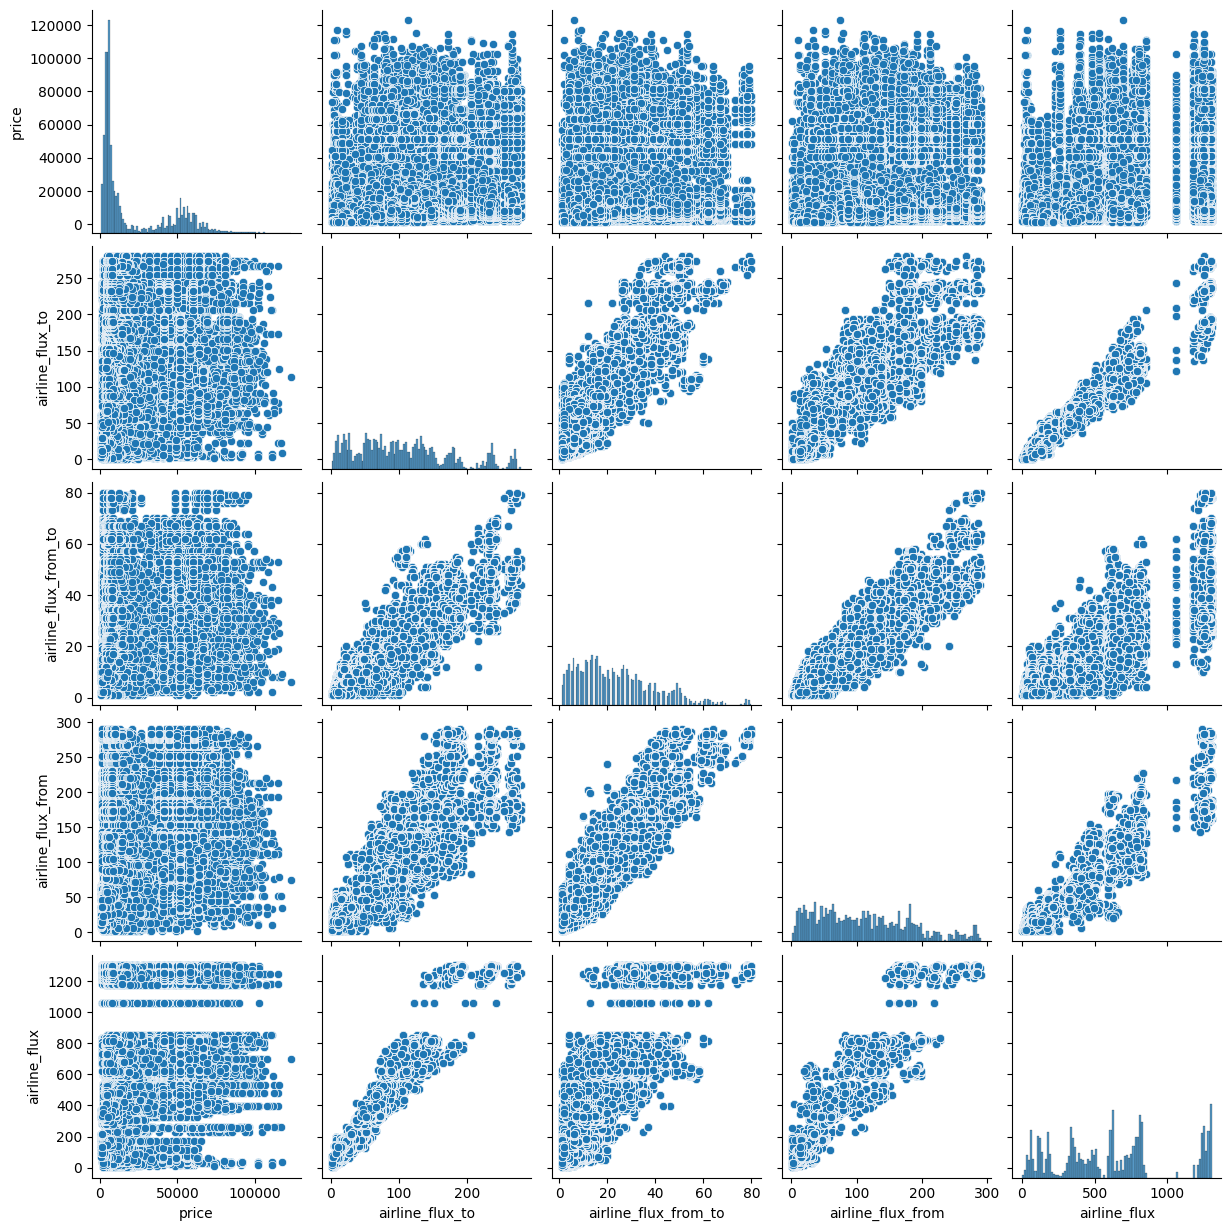

In [ ]:
numerical_data = df[['price', 'airline_flux_to', 'airline_flux_from_to',
                       'airline_flux_from', 'airline_flux']]

sns.pairplot(numerical_data, diag_kind='hist')
plt.show()

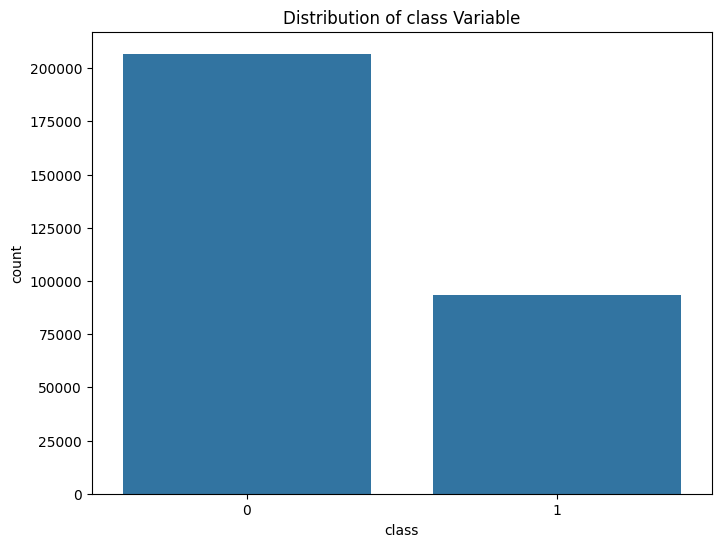

In [ ]:
# Understand the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Distribution of class Variable')
plt.show()

Distribution of Class Variable:
1. The countplot visualizes the distribution of the 'class' variable, which represents the class of the flight.
2. The x-axis represents the two classes: 'economy' and 'business'.
3. The y-axis represents the count of occurrences for each class.
4. The count of occurrences for 'economy' class is more than 200,000,
   while for 'business' class, it is close to 90,000.

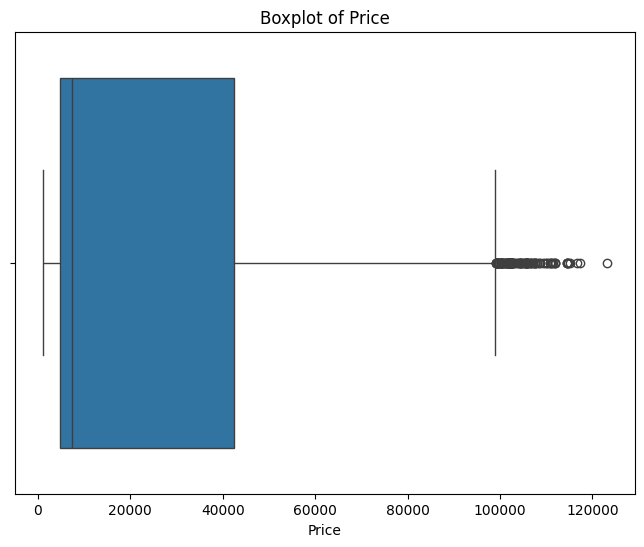

In [ ]:
#Checking out if outliers are present in the price column

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [ ]:
#Checking out the maximum and minimum ticket price of the respective flights
price_ranges = df.groupby('airline')['price'].agg(['min', 'max'])
print(price_ranges)

            min     max
airline                
Air India  1526   90970
AirAsia    1105   31917
GO FIRST   1105   32803
Indigo     1105   31952
SpiceJet   1106   34158
StarAir    2000   17482
Trujet     3124    4844
Vistara    1714  123071


In [ ]:
#Procedures followed to remove outlier

price_data = df['price']

# Calculate quartiles (Q1, Q2, Q3)
Q1 = np.percentile(price_data, 25)
Q2 = np.percentile(price_data, 50)  # Median
Q3 = np.percentile(price_data, 75)

# Calculate interquartile range (IQR)
IQR = Q3 - Q1

# Calculate lower fence and upper fence
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("Lower Fence:", lower_fence)
print("Upper Fence:", upper_fence)
print("Q1:", Q1)
print("Q2 (Median):", Q2)
print("Q3:", Q3)


Lower Fence: -51824.0
Upper Fence: 99128.0
Q1: 4783.0
Q2 (Median): 7425.0
Q3: 42521.0


In [ ]:
# Removing outliers from price column having price more than 99128.

price_condition = (df['price'] >= 99128) & (df['price'] <= 123071)
filtered_data = df[price_condition]
total_records = filtered_data.shape[0]

print("Total number of records with price between 99128 and 123071:", total_records)


Total number of records with price between 99128 and 123071: 123


In [ ]:
# Handle outliers in age column

df = df[(df['price'] > 0) & (df['price'] <= 99128)]  # Assuming a reasonable upper limit for age

# Verify the changes
print("Updated age range for each gender:")
price_ranges = df.groupby('airline')['price'].agg(['min', 'max'])
print(price_ranges)


Updated age range for each gender:
            min    max
airline               
Air India  1526  90970
AirAsia    1105  31917
GO FIRST   1105  32803
Indigo     1105  31952
SpiceJet   1106  34158
StarAir    2000  17482
Trujet     3124   4844
Vistara    1714  98972


In [ ]:
df.sample(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,class,datetime,ml_datetime,ml_time_taken,airline_flux,airline_flux_from,airline_flux_from_to,airline_flux_to,price
268309,18-03-2022,Air India,AI,9885,10:45,Hyderabad,09h 20m,1,20:05,Kolkata,0,2022-03-18 10:45:00,16476003,560,720,98,19,105,7563
290608,23-03-2022,Air India,AI,9894,08:30,Chennai,06h 25m,1,14:55,Bangalore,0,2022-03-23 08:30:00,16480242,385,738,137,19,94,3048
181262,02-03-2022,Air India,AI,610,19:10,Bangalore,17h 05m,1,12:15,Delhi,0,2022-03-02 19:10:00,16462482,1025,516,77,21,99,4294
10825,08-03-2022,Air India,AI,889,09:25,Delhi,08h 35m,1,18:00,Kolkata,1,2022-03-08 09:25:00,16467315,515,743,159,37,131,42212
3021,11-03-2022,Air India,AI,429,09:50,Delhi,30h 05m,1,15:55,Mumbai,1,2022-03-11 09:50:00,16469922,1805,725,150,44,181,44622


<ipython-input-22-1e467e5b5b34>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


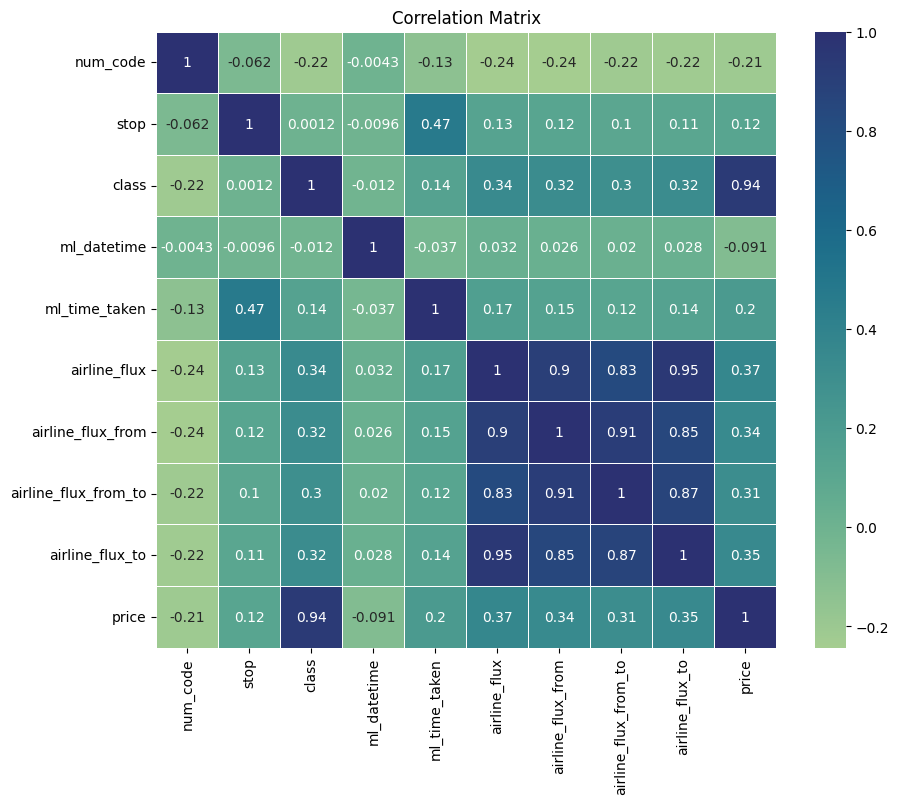

In [ ]:
#Checking out the correlation between the columns

correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Positive Correlation:

1. Variables with positive correlation coefficients move in the same direction. For example, 'class' has a strong positive correlation with 'price' (0.94), indicating that higher class flights tend to have higher prices.
2. Other variables like 'airline_flux', 'airline_flux_from', 'airline_flux_from_to', and 'airline_flux_to' also show positive correlations with 'price', although to a lesser extent.

Negative Correlation:

1. There are no significant negative correlations in this correlation matrix.

Strength of Correlation:

1. The strength of correlation varies across different pairs of variables. For instance, 'ml_time_taken' has a moderate positive correlation with 'price' (0.20), indicating that longer flight durations tend to be associated with higher prices.
2. 'num_code' and 'ml_time_taken' show negative correlations with 'price', though these correlations are relatively weak.

Insights:

1. The correlation matrix provides insights into which features are most strongly correlated with the target variable ('price').
2. Features like 'class', 'airline_flux', and 'ml_time_taken' appear to have significant correlations with 'price', suggesting that they may be important predictors for determining flight prices.
3. This information can guide feature selection and modeling decisions when building predictive models for flight prices

In [ ]:
relevant_cols = [ 'airline', 'ch_code', 'num_code', 'from','stop', 'to', 'ml_datetime','ml_time_taken', 'airline_flux', 'airline_flux_from',
                 'airline_flux_from_to', 'airline_flux_to', 'price']
categorical_cols = [ 'airline', 'ch_code', 'from', 'to']

In [ ]:
x = df[relevant_cols]
y = df['price']

In [ ]:
#Applying pandas one hot encoding for the nominal categorical columns

x = pd.get_dummies(x, columns=categorical_cols)
x.sample(5)

,num_code,stop,ml_datetime,ml_time_taken,airline_flux,airline_flux_from,airline_flux_from_to,airline_flux_to,price,airline_Air India,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
232795,496,1,16468950,390,350,70,16,56,4284,0,...,0,0,1,0,1,0,0,0,0,0
62886,778,1,16477896,480,647,77,20,135,60978,0,...,0,0,1,0,1,0,0,0,0,0
233605,512,1,16473201,675,63,11,3,15,6109,0,...,0,0,1,0,1,0,0,0,0,0
130780,1056,0,16458543,175,19,5,2,3,3251,0,...,1,0,0,0,0,1,0,0,0,0
107763,8938,1,16465023,1385,40,11,4,6,4301,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
#splintting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
# Creating a dictionary to store the results
results = {}

In [ ]:
#Model training

models = {
    "K-Nearest-Neighbor": KMeans(n_clusters = 2),
    "Random Forest": RandomForestRegressor(n_estimators=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=15, max_depth=3)}

#results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    r2 = r2_score(y_test, prediction)
    RMSE = mean_squared_error(y_test, prediction, squared=False)
    results[name] = {'RMSE': RMSE.round(3), 'r2': r2.round(3)}

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_result = pd.DataFrame(results)
df_result

,K-Nearest-Neighbor,Random Forest,Gradient Boosting
RMSE,30771.375,4.307,4790.599
r2,-0.846,1.000,0.955


The Random Forest model shows excellent performance with a very low RMSE and a perfect r2 score of 1.000. This indicates that the model perfectly predicts the flight prices based on the given features

In [ ]:
results_tuned = {}

In [ ]:
# Hyperparameter tuning

# Random Forest


param_grid = {
    'n_estimators': [2, 5, 10],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(x_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
# Gradient Boosting

param_grid = {
    'n_estimators': [10,15,20],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingRegressor()
grid_search_gb = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(x_train, y_train)

best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.3, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 20}


Model Training with Optimized Hyperparameters

Having tuned the hyperparameters of our base models and excluded the K-Nearest Neighbor model due to poor performance, we now proceed to train the remaining models using the optimized parameters. This will allow us to build a meta-model for dynamic pricing prediction based on the insights gained from the tuning process.

In [ ]:
# Random Forest and Gradient Boosting
models = {
    "Random Forest": RandomForestRegressor(**best_params_rf),
    "Gradient Boosting": GradientBoostingRegressor(**best_params_gb)}


for name, model in models.items():
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    r2 = r2_score(y_test, prediction)
    RMSE = mean_squared_error(y_test, prediction, squared=False)
    results_tuned[name] = {'RMSE': RMSE.round(3), 'r2': r2.round(3)}

In [ ]:
df_result_tuned = pd.DataFrame(results_tuned)
print(df_result_tuned)

      Random Forest  Gradient Boosting
RMSE          3.765             24.403
r2            1.000              1.000


In [ ]:
#Training neural network for prediction

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(37,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(x_train_scaled, y_train, batch_size=128, epochs=20, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", loss)



Epoch 1/20
1314/1314 [==============================] - 6s 4ms/step - loss: 575888640.0000 - val_loss: 221350896.0000
Epoch 2/20
1314/1314 [==============================] - 3s 2ms/step - loss: 121287584.0000 - val_loss: 26270138.0000
Epoch 3/20
1314/1314 [==============================] - 3s 2ms/step - loss: 30569484.0000 - val_loss: 11989009.0000
Epoch 4/20
1314/1314 [==============================] - 3s 2ms/step - loss: 28259422.0000 - val_loss: 11584603.0000
Epoch 5/20
1314/1314 [==============================] - 4s 3ms/step - loss: 28063438.0000 - val_loss: 11576187.0000
Epoch 6/20
1314/1314 [==============================] - 3s 2ms/step - loss: 26875634.0000 - val_loss: 8794774.0000
Epoch 7/20
1314/1314 [==============================] - 3s 2ms/step - loss: 24784640.0000 - val_loss: 7527504.5000
Epoch 8/20
1314/1314 [==============================] - 3s 2ms/step - loss: 24464464.0000 - val_loss: 7229928.5000
Epoch 9/20
1314/1314 [==============================] - 4s 3ms/step - lo

In [ ]:
from sklearn.metrics import r2_score

# Make predictions on the test data
y_pred = model.predict(x_test_scaled)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


2814/2814 [==============================] - 4s 1ms/step
R2 Score: 0.9938606884932046


Meta Model

Now that we have identified the best performing models (Gradient Boosting, Deep neural network, and Random Forest), we proceed to construct our meta model. In this phase, we will utilize the predictions generated by these base models to train a meta model, aiming to further enhance predictive accuracy and capture underlying patterns effectively.

In [ ]:
# Predictions from base models on the training data

rf_pred_train = models["Random Forest"].predict(x_train)
gb_pred_train = models["Gradient Boosting"].predict(x_train)
nn_pred_train = model.predict(x_train)

# Predictions from base models on the test data

rf_pred_test = models["Random Forest"].predict(x_test)
gb_pred_test = models["Gradient Boosting"].predict(x_test)
nn_pred_test = model.predict(x_test)

x_train_stacked = np.column_stack((rf_pred_train, gb_pred_train,nn_pred_train))
x_test_stacked = np.column_stack((rf_pred_test, gb_pred_test,nn_pred_test))

2814/2814 [==============================] - 5s 2ms/step


In [ ]:
models = {

    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()}

meta_results = {}

for name, model in models.items():
    model.fit(x_train_stacked, y_train)
    prediction = model.predict(x_test_stacked)
    r2 = r2_score(y_test, prediction)
    RMSE = mean_squared_error(y_test, prediction, squared=False)
    meta_results[name] = {'RMSE': RMSE.round(3), 'r2': r2.round(3)}

In [ ]:
df_meta_results = pd.DataFrame(meta_results)
df_meta_results

,Random Forest,Gradient Boosting
RMSE,3.384,101.605
r2,1.000,1.000


In conclusion, after comparing the performance of Deep neural network, Random Forest, and Gradient Boosting models for the stacked ensemble, we have determined that Random Forest exhibits the most promising results in terms of both RMSE and R². With its superior performance, Random Forest is selected as the preferred model for the stacked ensemble. This choice is supported by its ability to effectively utilize predictions from base models and its capacity to generalize well to unseen data, making it an optimal candidate for further tuning and deployment in the dynamic pricing strategy implementation.

In [ ]:
# Meta random forest regressor

param_grid = {
    'n_estimators': [5,10,15],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor()
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(x_train_stacked, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest Regressor:", best_params_rf)

Best Hyperparameters for Random Forest Regressor: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 15}


In [ ]:
best_rf_meta = RandomForestRegressor(**best_params_rf)
best_rf_meta.fit(x_train_stacked, y_train)

y_pred_meta = best_rf_meta.predict(x_test_stacked)
RMSE_meta = mean_squared_error(y_test, y_pred_meta, squared=False)
r2_meta = r2_score(y_test, y_pred_meta)

print("Meta-Model Performance:")
print("RMSE:", RMSE_meta.round(3))
print("R²:", r2_meta.round(3))

Meta-Model Performance:
RMSE: 115.679
R²: 1.0


Conclusion:

The project successfully addressed the problem of dynamic flight price prediction by implementing a comprehensive machine learning pipeline.
Through data preprocessing, model selection, and ensemble learning techniques, the project achieved accurate predictions of flight prices.
The stacked ensemble approach, particularly using Random Forest as the meta-model, demonstrated superior performance in predicting flight prices with minimal error.